# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('data/retailmax.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

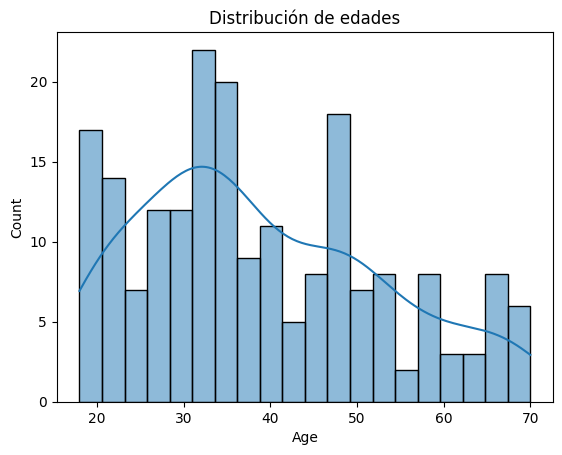

In [12]:
# 1. Distribución de edades (histograma con KDE)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de edades')
plt.xlabel('Age')
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

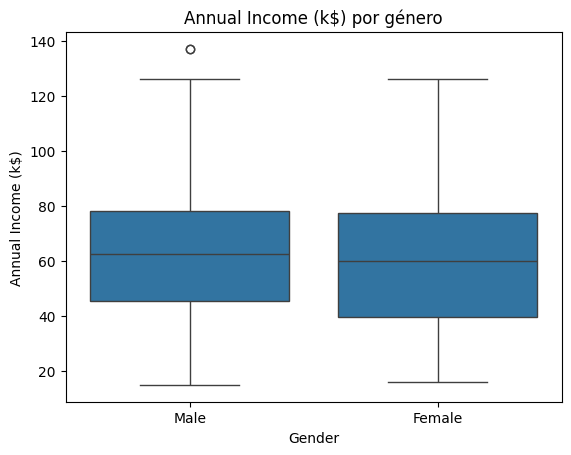

In [13]:
# 2. Diferencias en Annual Income por género (boxplot)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income (k$) por género')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

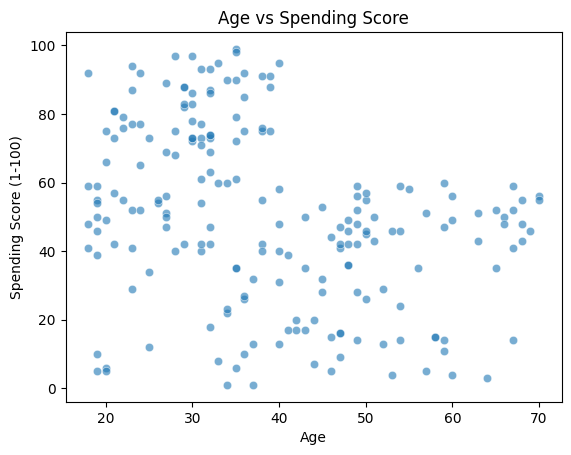

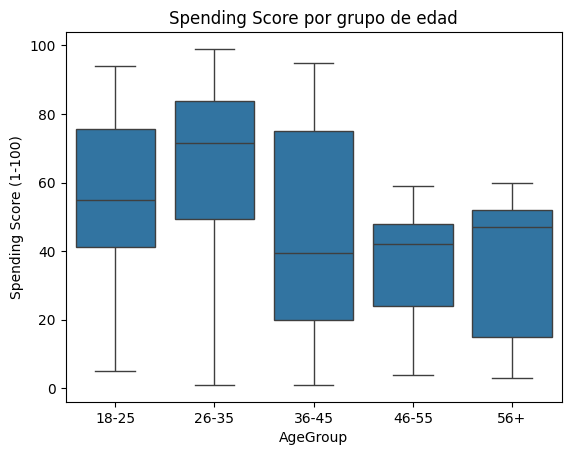

In [14]:
# 3. Spending Score vs rangos de edad (scatter y boxplot por grupos)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, alpha=0.6)
plt.title('Age vs Spending Score')
plt.show()
# Agrupar por rangos de edad y mostrar boxplot
df['AgeGroup'] = pd.cut(df['Age'], bins=[17,25,35,45,55,70], labels=['18-25','26-35','36-45','46-55','56+'])
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=df)
plt.title('Spending Score por grupo de edad')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

Pearson r = 0.01


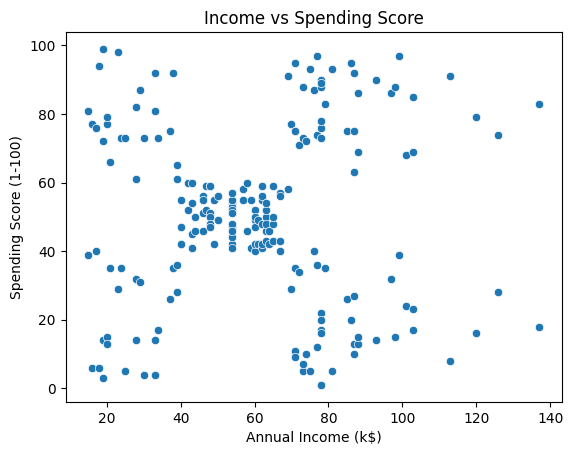

In [15]:
# 4. Correlación entre Annual Income y Spending Score
corr = df[['Annual Income (k$)','Spending Score (1-100)']].corr().iloc[0,1]
print('Pearson r =', round(corr,3))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

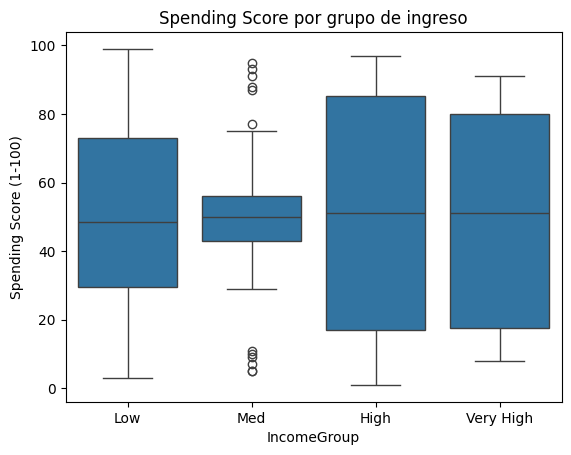

In [16]:
# 5. Spending Score por grupos de ingreso (bins)
df['IncomeGroup'] = pd.cut(df['Annual Income (k$)'], bins=4, labels=['Low','Med','High','Very High'])
sns.boxplot(x='IncomeGroup', y='Spending Score (1-100)', data=df)
plt.title('Spending Score por grupo de ingreso')
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


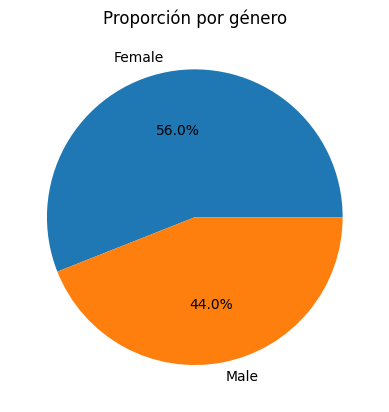

In [17]:
# 6. Proporción de clientes por género
print(df['Gender'].value_counts(normalize=True).round(3))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Proporción por género')
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

AgeGroup
26-35    64.450000
18-25    54.947368
36-45    44.833333
56+      38.379310
46-55    36.702703
Name: Spending Score (1-100), dtype: float64


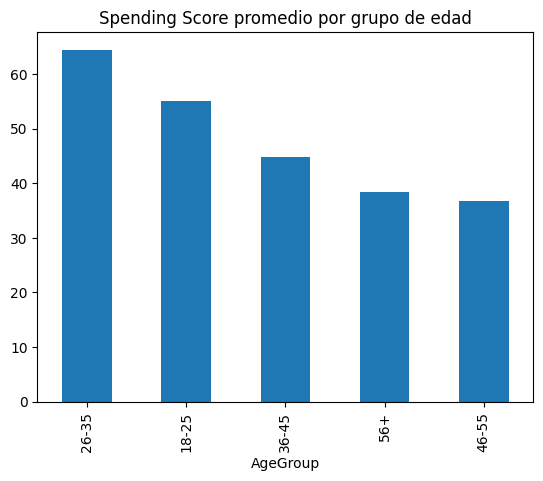

In [18]:
# 7. Grupos de edad que gastan más (promedio)
avg_by_age = df.groupby('AgeGroup')['Spending Score (1-100)'].mean().sort_values(ascending=False)
print(avg_by_age)
avg_by_age.plot.bar()
plt.title('Spending Score promedio por grupo de edad')
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

Pearson r (Age vs Income) = -0.012


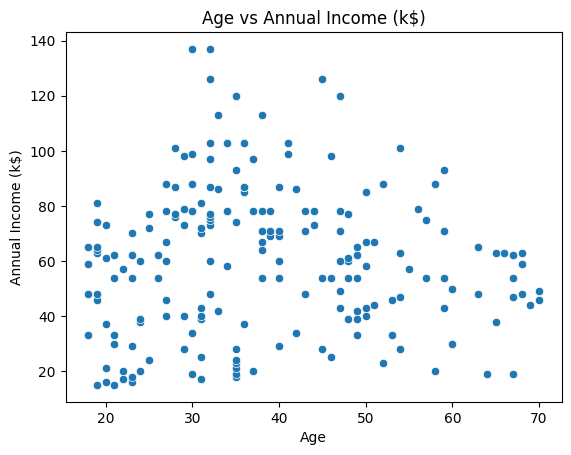

In [19]:
# 8. Relación entre Age y Annual Income (scatter + correlación)
corr_ai_age = df[['Age','Annual Income (k$)']].corr().iloc[0,1]
print('Pearson r (Age vs Income) =', round(corr_ai_age,3))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income (k$)')
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

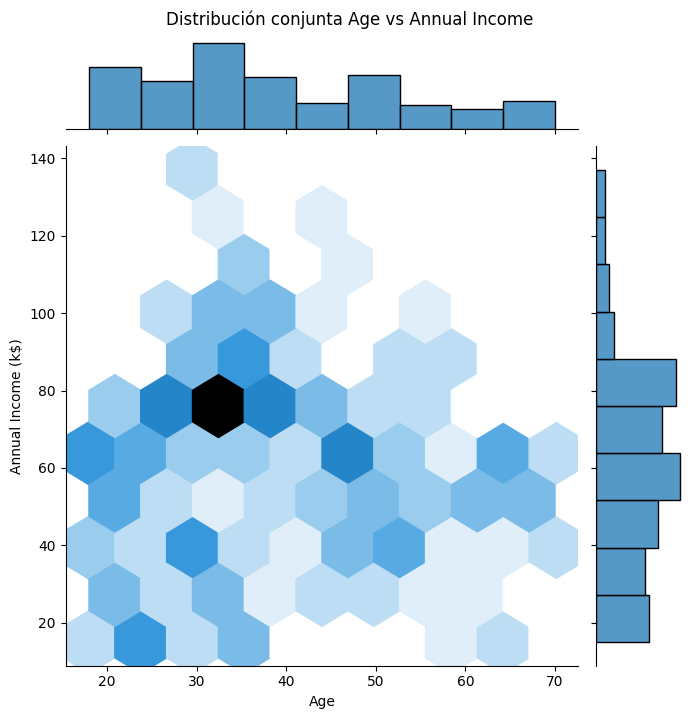

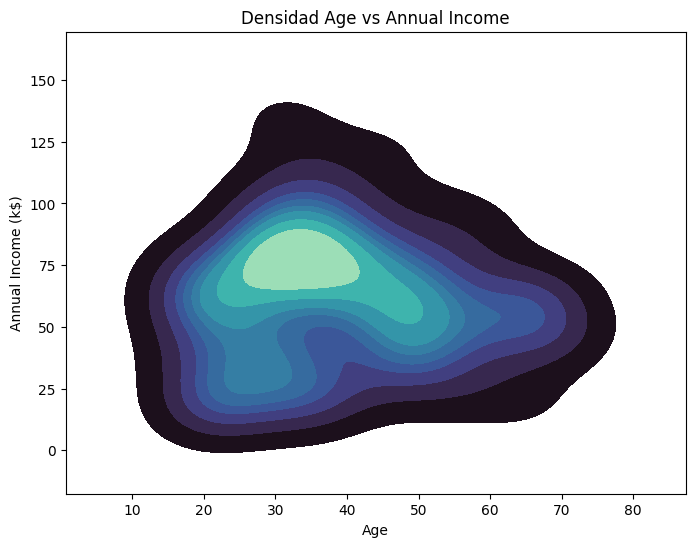

In [20]:
# 9. Distribución conjunta de Age y Annual Income (hexbin + KDE)
sns.jointplot(x='Age', y='Annual Income (k$)', data=df, kind='hex', height=7)
plt.suptitle('Distribución conjunta Age vs Annual Income', y=1.02)
plt.show()
# Alternativa: densidad bidimensional
plt.figure(figsize=(8,6))
sns.kdeplot(x=df['Age'], y=df['Annual Income (k$)'], fill=True, cmap='mako', thresh=0.05)
plt.title('Densidad Age vs Annual Income')
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

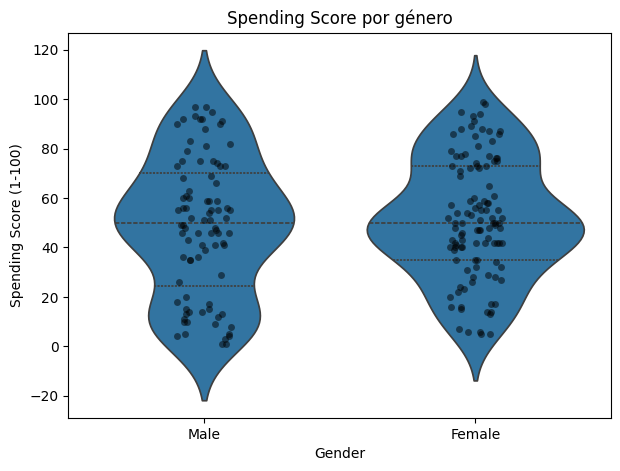

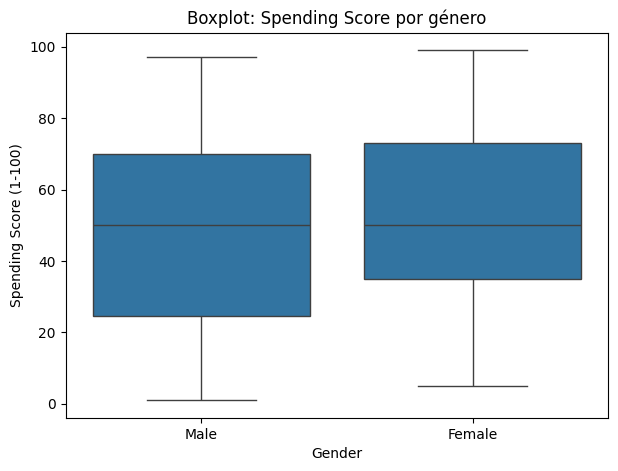

In [21]:
# 10. Distribución de Spending Score por género (violin + strip)
plt.figure(figsize=(7,5))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, inner='quartile')
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df, color='k', alpha=0.5, jitter=True)
plt.title('Spending Score por género')
plt.show()
# Alternativa: boxplot separado por género
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Boxplot: Spending Score por género')
plt.show()